## Classification Model for MNIST data

Used the following repos/articles for guidance and code:
1. https://github.com/astorfi/TensorFlow-World/tree/master/docs/tutorials/3-neural_network/autoencoder
2. https://towardsdatascience.com/understanding-input-and-output-shapes-in-convolution-network-keras-f143923d56ca
3. https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
4. https://paperswithcode.com/sota/image-classification-on-mnist

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform
import sys
import pickle

# keras API uses TensorFlow or Theano
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Reshape, LeakyReLU

In [44]:
file_pathway = 'mnist_full.pkl' # found in data folder
print(file_pathway)
with open(file_pathway, 'rb') as f:
    mnist_full = pickle.load(f)
    mnist_x_train = mnist_full["x_train"]
    mnist_y_train = mnist_full["y_train"]
    mnist_x_test = mnist_full['x_test']
    mnist_y_test = mnist_full['y_test']

print("obtained mnist training and testing files")

mnist_full.pkl
obtained mnist training and testing files


In [40]:
# greyscale visualization
#(x_trn, y_trn), (x_tst, y_tst) = tf.keras.datasets.mnist.load_data() --> keras data itself
x_trn = mnist_x_train
y_trn = mnist_y_train
x_tst = mnist_x_test
y_tst = mnist_y_test
img_idx = 77 # change this to be any index up to 60,000 as that is the size of the trained set
print(y_trn[img_idx])
print(x_trn.shape)
#plt.imshow(x_trn[img_idx], cmap='Greys')

0
(55000, 1, 28, 28)


In [45]:
def resize_batch(imgs):
    # A function to resize a batch of MNIST images to (32, 32)
    # Args:
    #   imgs: a numpy array of size [batch_size, 28 X 28].
    # Returns:
    #   a numpy array of size [batch_size, 32, 32].
    imgs = imgs.reshape((-1, 28, 28, 1))
    resized_imgs = np.zeros((imgs.shape[0], 32, 32, 1))
    for i in range(imgs.shape[0]):
        resized_imgs[i, ..., 0] = transform.resize(imgs[i, ..., 0], (32, 32))
    return resized_imgs

In [46]:
# reshape and normalize images

print("reshaping")

pix_size = 32

print("og x_trn.shape: ",x_trn.shape)
print("og x_tst.shape: ", x_tst.shape)

x_trn_resize_32 = resize_batch(x_trn)
x_tst_resize_32 = resize_batch(x_tst)

print("x_trn_resize_32.shape: ",x_trn_resize_32.shape)
print("x_tst_resize_32.shape: ",x_tst_resize_32.shape)

x_trn_2 = x_trn_resize_32.reshape(x_trn_resize_32.shape[0], pix_size, pix_size, 1)
x_tst_2 = x_tst_resize_32.reshape(x_tst_resize_32.shape[0], pix_size, pix_size, 1)
x_trn_2 = x_trn_2.astype('float32')
x_tst_2 = x_tst_2.astype('float32')

x_trn_2 /= 255
x_tst_2 /= 255

print("new x train shape: ", x_trn_2.shape)
print("Number of images in x train: ", x_trn_2.shape[0])
print("Number of images in x test: ", x_tst_2.shape[0])

print("finished reshaping")

reshaping
og x_trn.shape:  (55000, 1, 28, 28)
og x_tst.shape:  (10000, 1, 28, 28)
x_trn_resize_32.shape:  (55000, 32, 32, 1)
x_tst_resize_32.shape:  (10000, 32, 32, 1)
new x train shape:  (55000, 32, 32, 1)
Number of images in x train:  55000
Number of images in x test:  10000
finished reshaping


In [47]:
# building convolutional neural network -- CNN
in_shape = (32, 32, 1)
mdl = Sequential()
kernel_size_conv = (4,4) # originally 3,3
#convolutional layer
conv_2d = Conv2D(pix_size, kernel_size=kernel_size_conv, padding="same", strides=(2,2), input_shape=in_shape)
mdl.add(conv_2d)

#increasing output channel (filter) size
in_shape = (32, 32, 1)
conv_2d = Conv2D(64, kernel_size=kernel_size_conv, padding="same", strides=(2,2), input_shape=in_shape)
mdl.add(conv_2d)
in_shape = (64, 64, 1)
conv_2d = Conv2D(128, kernel_size=kernel_size_conv, padding="same", strides=(2,2), input_shape=in_shape)
mdl.add(conv_2d)
in_shape = (128, 128, 1)
conv_2d = Conv2D(256, kernel_size=kernel_size_conv, padding="same", strides=(2,2), input_shape=in_shape)
mdl.add(conv_2d)
in_shape = (256, 256, 1)
conv_2d = Conv2D(512, kernel_size=kernel_size_conv, padding="same", strides=(2,2), input_shape=in_shape)
mdl.add(conv_2d)

#leaky relu layer
leaky_reLU = LeakyReLU(alpha=0.2)
mdl.add(leaky_reLU)
#maxpool_2d = MaxPooling2D(pool_size=(2,2))

#dropout layer
dropout = Dropout(0.2)
mdl.add(dropout)

#flatten layer
flat = Flatten()
mdl.add(flat)

#dense layer
dense_r = 512 # originally 128
denselayer_r = Dense(dense_r, activation=tf.nn.relu) # changed density
mdl.add(denselayer_r)
dense_c = 10
denselayer_c = Dense(dense_c, activation=tf.nn.softmax)
mdl.add(denselayer_c)

In [48]:
# compiling and fitting model

mdl.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mdl.fit(x=x_trn_2, y=y_trn, epochs=10)

Epoch 1/10
55000/55000 [==============================] - 229s 4ms/step - loss: 0.4201 - accuracy: 0.8595
Epoch 2/10
55000/55000 [==============================] - 227s 4ms/step - loss: 0.1791 - accuracy: 0.9453
Epoch 3/10
55000/55000 [==============================] - 227s 4ms/step - loss: 0.1486 - accuracy: 0.9533
Epoch 4/10
55000/55000 [==============================] - 385s 7ms/step - loss: 0.1311 - accuracy: 0.9598
Epoch 5/10
55000/55000 [==============================] - 226s 4ms/step - loss: 0.1231 - accuracy: 0.9627
Epoch 6/10
55000/55000 [==============================] - 226s 4ms/step - loss: 0.1093 - accuracy: 0.9670
Epoch 7/10
55000/55000 [==============================] - 241s 4ms/step - loss: 0.1082 - accuracy: 0.9672
Epoch 8/10
55000/55000 [==============================] - 226s 4ms/step - loss: 0.1167 - accuracy: 0.9656
Epoch 9/10
55000/55000 [==============================] - 311s 6ms/step - loss: 0.0934 - accuracy: 0.9722
Epoch 10/10
55000/55000 [=====================

In [49]:
# evaluate model
mdl.evaluate(x_tst_2, y_tst)

10000/10000 [==============================] - 2s 159us/step


[0.11381538770179468, 0.9672999978065491]

9


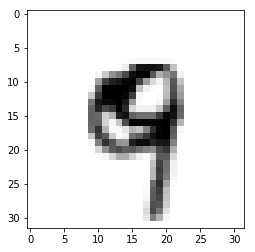

In [50]:
#individual predictions
img_idx = 4444
plt.imshow(x_tst_2[img_idx].reshape(pix_size,pix_size), cmap='Greys')
pred = mdl.predict(x_tst_2[img_idx].reshape(1, pix_size, pix_size, 1))
print(pred.argmax())